In [1]:
from __future__ import print_function, division
%run ../basics.ipynb

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['show_config']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Loading BokehJS ...

Using TensorFlow backend.


In [2]:
df = pd.read_csv('../data/learning_resources.csv')
display(df.head(2))
tags = pd.read_csv('../data/tags.csv')
display(tags.head(2))
df['tags'] = df['id'].apply(lambda x: (' '.join(tags[tags['id'] == x]['concept_tag'].values.tolist())).strip())
print(df.columns)
print(df.count()/len(df)*100)
df.head(2)

,id,title,subtitle,description,short_description,syllabus,url,slug,difficulty,created,...,available,end_date,typical_learning_time,rating,price,new,language,format,license,venue
0,cs101,Intro to Computer Science,Build a Search Engine & a Social Network,In this introduction to computer programming c...,Learn key computer science concepts in this in...,###Lesson 1: How to Get Started\n\n- Interview...,https://www.udacity.com/course/intro-to-comput...,intro-to-computer-science--cs101,beginner,NaN,...,NaN,NaN,3months,NaN,Free,NaN,en,MOOC,Creative Commons Attribution-NonCommercial- No...,Udacity
1,ud257,A/B Testing,Online Experiment Design and Analysis,This course will cover the design and analysis...,This course will cover the design and analysis...,### Lesson 1: Overview of A/B Testing\nThis le...,https://www.udacity.com/course/ab-testing--ud2...,ab-testing--ud257,intermediate,NaN,...,NaN,NaN,1months,NaN,Free,NaN,en,MOOC,Creative Commons Attribution-NonCommercial- No...,Udacity


,id,shortname,concept_tag,url
0,ud257,ab-testing--ud257,video_lecture,https://www.udacity.com/course/ab-testing--ud2...
1,ud257,ab-testing--ud257,in_depth,https://www.udacity.com/course/ab-testing--ud2...


Index([u'id', u'title', u'subtitle', u'description', u'short_description',
       u'syllabus', u'url', u'slug', u'difficulty', u'created',
       u'date_modified', u'date_published', u'available', u'end_date',
       u'typical_learning_time', u'rating', u'price', u'new', u'language',
       u'format', u'license', u'venue', u'tags'],
      dtype='object')
id                       100.000000
title                     99.781659
subtitle                  25.545852
description               85.152838
short_description          3.711790
syllabus                  10.043668
url                      100.000000
slug                     100.000000
difficulty                24.235808
created                   44.978166
date_modified              0.000000
date_published            44.978166
available                 44.978166
end_date                   0.000000
typical_learning_time     44.104803
rating                    17.685590
price                     98.689956
new                        0.00

,id,title,subtitle,description,short_description,syllabus,url,slug,difficulty,created,...,end_date,typical_learning_time,rating,price,new,language,format,license,venue,tags
0,cs101,Intro to Computer Science,Build a Search Engine & a Social Network,In this introduction to computer programming c...,Learn key computer science concepts in this in...,###Lesson 1: How to Get Started\n\n- Interview...,https://www.udacity.com/course/intro-to-comput...,intro-to-computer-science--cs101,beginner,NaN,...,NaN,3months,NaN,Free,NaN,en,MOOC,Creative Commons Attribution-NonCommercial- No...,Udacity,video_lecture project overview computer_scienc...
1,ud257,A/B Testing,Online Experiment Design and Analysis,This course will cover the design and analysis...,This course will cover the design and analysis...,### Lesson 1: Overview of A/B Testing\nThis le...,https://www.udacity.com/course/ab-testing--ud2...,ab-testing--ud257,intermediate,NaN,...,NaN,1months,NaN,Free,NaN,en,MOOC,Creative Commons Attribution-NonCommercial- No...,Udacity,video_lecture in_depth project data_collection...


In [13]:
class NN(BaseEstimator):
    def __init__(self, max_len, n_words, embedding_dim):
        self.nn = None
        self.max_len = max_len
        self.n_words = n_words
        self.embedding_dim = embedding_dim
        
    def build_nn(self, X, y):
        i = Input(shape=(X.shape[1],), dtype='int32', )
        emb = Embedding(input_dim=self.n_words*2, output_dim=self.embedding_dim, input_length=self.max_len)
        e = emb(i)
        
        conv = Convolution1D(nb_filter=10, filter_length=3, input_dim=self.embedding_dim)
        c = conv(e)
        
        pool = MaxPooling1D(pool_length=5, border_mode='same')
        p = pool(c)
        
        d1 = Dense(100, activation='tanh', W_regularizer=None)(Flatten()(p))
        out = Dense(1, activation='sigmoid')(d1)
        model = Model(i, out)
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse'])
        print(model.summary())
        self.nn = model
        
    def fit(self, X, y, n_epoch=3, shuffle=True, batch_size=1, verbose=2, secondary_y=False):
        print('NN input')
        print(X.shape)
        print(y.shape)
        self.build_nn(X, y)
        Y_flatten = np.array(y).flatten()
        w = gen_weights(Y_flatten)
        print('baseline mean mse:', mean_squared_error(Y_flatten, np.array([Y_flatten.mean()]*len(Y_flatten))))
        start = datetime.datetime.now()
        hist = self.nn.fit(X, y,
                          batch_size=batch_size,
                          shuffle=shuffle,
                          nb_epoch=n_epoch, 
                          verbose=verbose,
                          sample_weight=w)
        print('nn training:', datetime.datetime.now() - start)
        if 'val_loss' in hist.history:
            data = zip(hist.history['loss'], hist.history['val_loss'])
            hist_df = pd.DataFrame(columns=['train', 'val'], data=data)
            hist_df.plot(y=['train', 'val'], secondary_y=['val'] if secondary_y else None)
            plt.show()
        else:
            data = hist.history['loss']
            hist_df = pd.DataFrame(columns=['train'], data=data)
            hist_df.plot(y=['train'])
            plt.show()
        
    def predict(self, X):
        return self.nn.predict(X)
    
    def predict_proba(self, X):
        y = self.predict(X)
        return np.hstack([1-y, y])

In [14]:
class CLF(object):
    def __init__(self, n_topics=20, tag_vec_max_df=None, tag_vec_min_df=None, max_len=100, embedding_dim=3):
        self.n_topics = n_topics
        self.vectorizer = Digitizer()
        
        self.tag_vectorizer = CountVectorizer(max_df=.3 if tag_vec_max_df is None else tag_vec_max_df,
                                              min_df=0 if tag_vec_min_df is None else tag_vec_min_df)
        
        self.clf = None
        self.topic_dict = None
        self.max_len = max_len
        self.n_words = 0
        self.embedding_dim = embedding_dim

    def fit(self, X, y, viz=True, *args, **kwargs):
        orig_X = X.copy()
        X = self.prepare_X(X)
        X = self.vectorize_X(X)
        y = self.vectorize_y(y, fit=True)
        print('fit shapes')
        print(X.shape)
        print(y.shape)
        print('#words:', self.vectorizer.num_words())
        self.clf = OneVsRestClassifier(NN(max_len=X.shape[1], 
                                          n_words = self.vectorizer.num_words(),
                                          embedding_dim = self.embedding_dim))
        self.clf.fit(X, y, *args, **kwargs)
        
    def predict(self, X):
        X = self.prepare_X(X)
        X = self.vectorize_X(X, fit=False)
        return self.clf.predict_proba(X)
    
    @staticmethod
    def prepare_X(X):
        if isinstance(X, pd.DataFrame):
            concat_x = pd.Series(index=X.index, data='')
            for i in X.columns:
                concat_x += ' ' + X[i].apply(text_cleanup)
            X = concat_x
        else:
            assert isinstance(X, pd.Series)
        return X
        
    def vectorize_X(self, X, fit=False, viz=False):
        return np.vstack(self.vectorizer.series_digitizer(X, max_len=self.max_len).values)
    
    def vectorize_y(self, y, fit=False):
        if fit:
            y = y.fillna(' ')
            y = self.tag_vectorizer.fit_transform(y.values)
            if self.tag_vectorizer.stop_words_:
                print('ignored tags:')
                print(' ,'.join(self.tag_vectorizer.stop_words_))
            print('considered tags: (tag, resources tagged in %)')
            print(' ,'.join(map(str, sorted(zip(self.tag_vectorizer.get_feature_names(), 
                              np.array(y.sum(axis=0)).flatten()/y.shape[0]*100, 
                              np.array(y.sum(axis=0)).flatten()), key=itemgetter(1), reverse=True))))
        else:
            y = self.tag_vectorizer.transform(y.values)
        y = (y > 0).astype('float').todense()
        print('y shape', y.shape)
        return y
    
    def get_tag_names(self):
        return self.tag_vectorizer.get_feature_names()

# resources: 458
tagged resources: 356
ignored tags:
graph_data ,high_performance_computing ,computer_science ,tabular_data ,classification ,programming_tool ,overview ,graph_database ,data_science_process ,project_focused ,data_integration ,engineering ,topic_model ,image_data ,text_data ,education ,regression ,galaxy ,fmri ,data_cleaning ,data_collection ,nosql ,xml ,probabilistic_graphical_model ,dimensionality_reduction ,hadoop ,supervised_learning ,html ,probability_statistics ,mobile_devices ,streaming_data ,ethics ,artificial_intelligence ,reproducibility ,clustering ,biology ,genomic_data ,healthcare ,python ,knowledge_representation ,reinforcement_learning ,javascript ,time_series_data ,business_analytics ,natural_language_processing ,graph_analytics ,databases ,neural_networks ,mathematics ,genetics ,spark ,ensemble_learning ,case_study ,kernel_methods ,gis ,relational_database ,unsupervised_learning ,linear_algebra ,association_rule_learning ,economics ,programming ,social_s

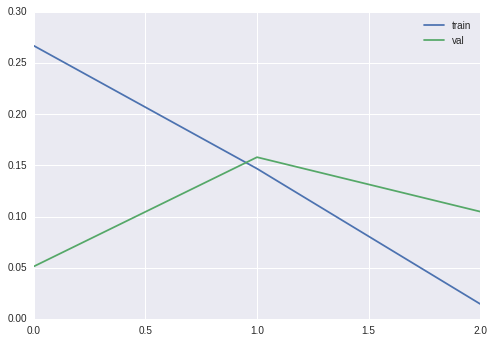

NN input
(458, 755)
(458,)
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 755)           0                                            
____________________________________________________________________________________________________
embedding_2 (Embedding)          (None, 755, 100)      593500      input_2[0][0]                    
____________________________________________________________________________________________________
convolution1d_2 (Convolution1D)  (None, 753, 10)       3010        embedding_2[0][0]                
____________________________________________________________________________________________________
maxpooling1d_2 (MaxPooling1D)    (None, 151, 10)       0           convolution1d_2[0][0]            
________________________________________________________________

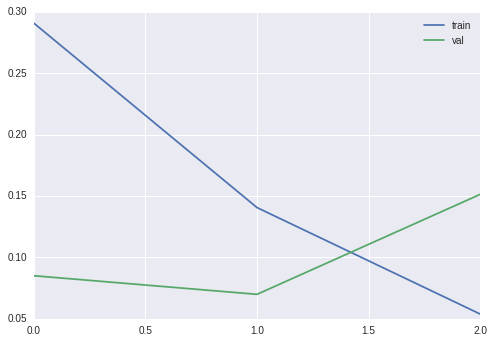

NN input
(458, 755)
(458,)
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_3 (InputLayer)             (None, 755)           0                                            
____________________________________________________________________________________________________
embedding_3 (Embedding)          (None, 755, 100)      593500      input_3[0][0]                    
____________________________________________________________________________________________________
convolution1d_3 (Convolution1D)  (None, 753, 10)       3010        embedding_3[0][0]                
____________________________________________________________________________________________________
maxpooling1d_3 (MaxPooling1D)    (None, 151, 10)       0           convolution1d_3[0][0]            
________________________________________________________________

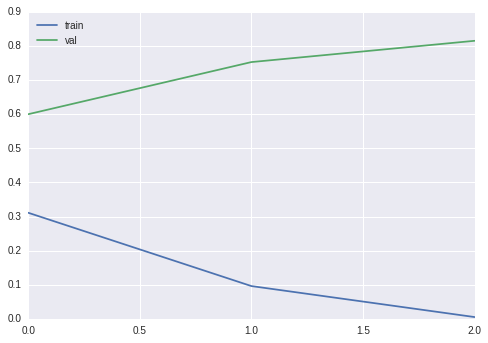

NN input
(458, 755)
(458,)
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_4 (InputLayer)             (None, 755)           0                                            
____________________________________________________________________________________________________
embedding_4 (Embedding)          (None, 755, 100)      593500      input_4[0][0]                    
____________________________________________________________________________________________________
convolution1d_4 (Convolution1D)  (None, 753, 10)       3010        embedding_4[0][0]                
____________________________________________________________________________________________________
maxpooling1d_4 (MaxPooling1D)    (None, 151, 10)       0           convolution1d_4[0][0]            
________________________________________________________________

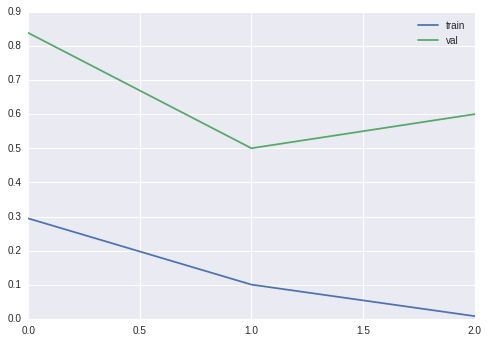

In [5]:
clf = CLF(tag_vec_min_df=0.15, tag_vec_max_df=1., max_len=1000, embedding_dim=100)
print('# resources:', len(df))
print('tagged resources:', (df['tags'].apply(len) > 0).sum())
clf.fit(df[['title', 'subtitle', 'description', 'syllabus']], df['tags'], 
        viz=True)
#clf.plot_word_and_tag_clouds(df[['title', 'subtitle', 'description', 'syllabus']], df['tags'])

In [6]:
y_pred = clf.predict(df[['title', 'subtitle', 'description', 'syllabus']])
print(y_pred.shape)

(458, 4)


In [7]:
pos_th = 0.5
neg_th = 0.1
tags_rec = False
tags_rev = False
recs = list()
revs = list()
y_true = clf.vectorize_y(df['tags'])
tags = np.array(clf.get_tag_names())

print(classification_report(y_true, y_pred > .5, target_names=tags))

for idx, title in enumerate(df['title']):
    y_pred_row = np.array(y_pred[idx, :]).flatten()
    y_true_row = np.array(y_true[idx, :]).flatten()
    recommended_tags = (y_pred_row >= pos_th) & (y_true_row < 0.5)
    recommended_tags = zip(tags[recommended_tags], y_pred_row[recommended_tags])
    
    revise_tags = (y_pred_row <= neg_th) & (y_true_row > 0.5)
    revise_tags = zip(tags[revise_tags], y_pred_row[revise_tags])
    
    if (len(recommended_tags) > 0 and tags_rec) or (len(revise_tags) > 0 and tags_rev):
        print(title)
        df_entry = df.iloc[idx]
        c_id, c_url = df_entry['id'], df_entry['url']
        print(c_id, c_url)
        if len(recommended_tags) > 0 and tags_rec:
            print('  recommended tags:')
            for i, p in sorted(recommended_tags, key=itemgetter(1), reverse=True):
                print('\t', i, '(%.2f' % (p * 100), '% )')
                recs.append((c_id, i, p * 100))
        if len(revise_tags) > 0 and tags_rev:
            print('  revise tags:')
            for i, p in sorted(revise_tags, key=itemgetter(1)):
                print('\t', i, '(%.2f' % ((1. - p) * 100), '% )')
                revs.append((c_id, i, (1. - p) * 100))
        print('-' * 80)

y shape (458, 4)
                  precision    recall  f1-score   support

        in_depth       0.93      1.00      0.97        85
machine_learning       0.95      0.98      0.97       132
            mooc       0.87      1.00      0.93       150
   video_lecture       0.89      1.00      0.94       149

     avg / total       0.91      1.00      0.95       516



In [ ]:
rec_df = pd.DataFrame(columns=['id', 'tag', 'probability'], data=recs)
rec_df.to_csv('tag_recommendations.csv', encoding='utf-8', index=False, quoting=QUOTE_ALL)

In [ ]:
rev_df = pd.DataFrame(columns=['id', 'tag', 'probability'], data=revs)
rev_df.to_csv('tag_revision.csv', encoding='utf-8', index=False, quoting=QUOTE_ALL)

In [ ]:
pd.DataFrame((y_pred > 0.5).sum(axis=1)).plot(kind='hist', bins=20)

In [ ]:
pd.DataFrame((y_true > 0.5).sum(axis=1)).plot(kind='hist', bins=20)

  0%|          | 0/10 [00:00<?, ?it/s]

# resources: 458
tagged resources: 356
ignored tags:
graph_data ,high_performance_computing ,computer_science ,tabular_data ,classification ,programming_tool ,overview ,graph_database ,data_science_process ,project_focused ,ensemble_learning ,engineering ,topic_model ,text_data ,education ,regression ,galaxy ,in_depth ,clustering ,data_cleaning ,data_collection ,information_retrieval ,probabilistic_graphical_model ,dimensionality_reduction ,hadoop ,supervised_learning ,probability_statistics ,mathematics ,ethics ,artificial_intelligence ,reproducibility ,fmri ,biology ,javascript ,healthcare ,python ,knowledge_representation ,reinforcement_learning ,databases ,time_series_data ,business_analytics ,genomic_data ,social_sciences ,neural_networks ,streaming_data ,machine_learning ,genetics ,spark ,data_integration ,case_study ,kernel_methods ,gis ,relational_database ,unsupervised_learning ,linear_algebra ,association_rule_learning ,economics ,programming ,graph_analytics ,recommender_sys

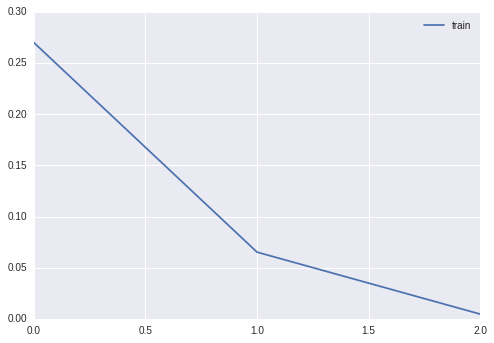

NN input
(422, 734)
(422,)
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_10 (InputLayer)            (None, 734)           0                                            
____________________________________________________________________________________________________
embedding_10 (Embedding)         (None, 734, 300)      3339000     input_10[0][0]                   
____________________________________________________________________________________________________
convolution1d_10 (Convolution1D) (None, 732, 10)       9010        embedding_10[0][0]               
____________________________________________________________________________________________________
maxpooling1d_10 (MaxPooling1D)   (None, 147, 10)       0           convolution1d_10[0][0]           
________________________________________________________________

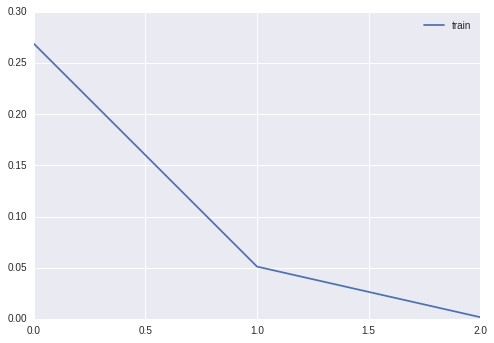

Exception: Error when checking : expected input_9 to have shape (None, 734) but got array with shape (36, 755)

In [15]:
#%run ../basics.ipynb
print('# resources:', len(df))
print('tagged resources:', (df['tags'].apply(len) > 0).sum())
tag_idx = df[df['tags'].apply(len) > 0].index
all_idx = set(df.index)
all_y_pred = list()
all_y_true = list()
tag_names = list()
n_folds = 10

for train_idx, test_idx in tqdm(KFold(len(tag_idx), n_folds=n_folds), total=n_folds):
    test_idx = tag_idx[test_idx]
    train_idx = list(all_idx - set(test_idx))
    train_df = df.loc[train_idx].copy()
    test_df = df.loc[test_idx].copy()
    clf = CLF(tag_vec_min_df=0.18, max_len=2000, embedding_dim=300)
    clf.fit(train_df[['title', 'subtitle', 'description', 'syllabus']], 
            train_df['tags'], 
            viz=False)
    y_pred = clf.predict(test_df[['title', 'subtitle', 'description', 'syllabus']])
    y_true = clf.vectorize_y(test_df['tags'])
    # print('hamming loss:', hamming_loss(y_true, y_pred))
    all_y_pred.append(y_pred)
    all_y_true.append(y_true)
    tag_names.append(clf.get_tag_names())

In [ ]:
for pred_th in [0.25, 0.3, 0.4, 0.5, 0.75, 0.9]:
    all_tags = sorted(set([j for i in tag_names for j in i]))
    tmp_all_y_true = list()
    tmp_all_y_pred = list()
    for y_true, y_pred, t_names in zip(all_y_true, all_y_pred, tag_names):
        tmp_y_t = np.zeros((y_true.shape[0], len(all_tags)))
        tmp_y_p = np.zeros((y_pred.shape[0], len(all_tags)))
        sorting = np.array([all_tags.index(i) for i in t_names])
        tmp_y_t[:, sorting] = y_true
        tmp_y_p[:, sorting] = y_pred > pred_th
        tmp_all_y_true.extend([np.array(i).flatten() for i in tmp_y_t])
        tmp_all_y_pred.extend([np.array(i).flatten() for i in tmp_y_p])

    #print('res shape:', all_y_true.shape)
    print(classification_report(np.array(tmp_all_y_true), np.array(tmp_all_y_pred), target_names=all_tags))
    print('hamming loss:', hamming_loss(np.array(tmp_all_y_true), np.array(tmp_all_y_pred)))
    print('LRAP:', label_ranking_average_precision_score(np.array(tmp_all_y_true), np.array(tmp_all_y_pred)))

In [ ]:
clf = CLF(n_topics=30, tag_vec_min_df=0)
print('# resources:', len(df))
print('tagged resources:', (df['tags'].apply(len) > 0).sum())
clf.plot_word_and_tag_clouds(df[['title', 'subtitle', 'description', 'syllabus']], df['tags'], fit=True, viz=True, th=0.1)